# The Story
It's a hot day out.  The air conditioner is out and our rent is coming due. You have spent countless hours following leads.  We get a call from a school that wants to dabble in machine learning.  As a trial run they are willing to provide you with a moderate collection of deidentified student data and of a small allowance. In return they expect a quality machine learning model that predicts final student grades.


# The Data
The organization has provided a single table of several thousand rows of data from the prior academic year. Since this is a story we have the luxury of deciding our true data model to estimate.  We will generate realisitic(ish) data.

In our formulas we will denote features(predictors) by X. The final course grade is generated by the the function Y. Our task is to estimate Y based on the provided data. This will support the university in identification and remediation of struggling students. The data includes observations of the final course grade for the data provided. 

Several generating models are specified below. We will use the uncommented model. We highly recomend experimenting with variations.  Our feature samples are generated using numpy's random generators. We include the addition of noise to our data model to add a depth of realism. The amount of noise is a major factor in our ability to predict anything.  A scatter plot for each pair of variables is created to interpret how our features are related.

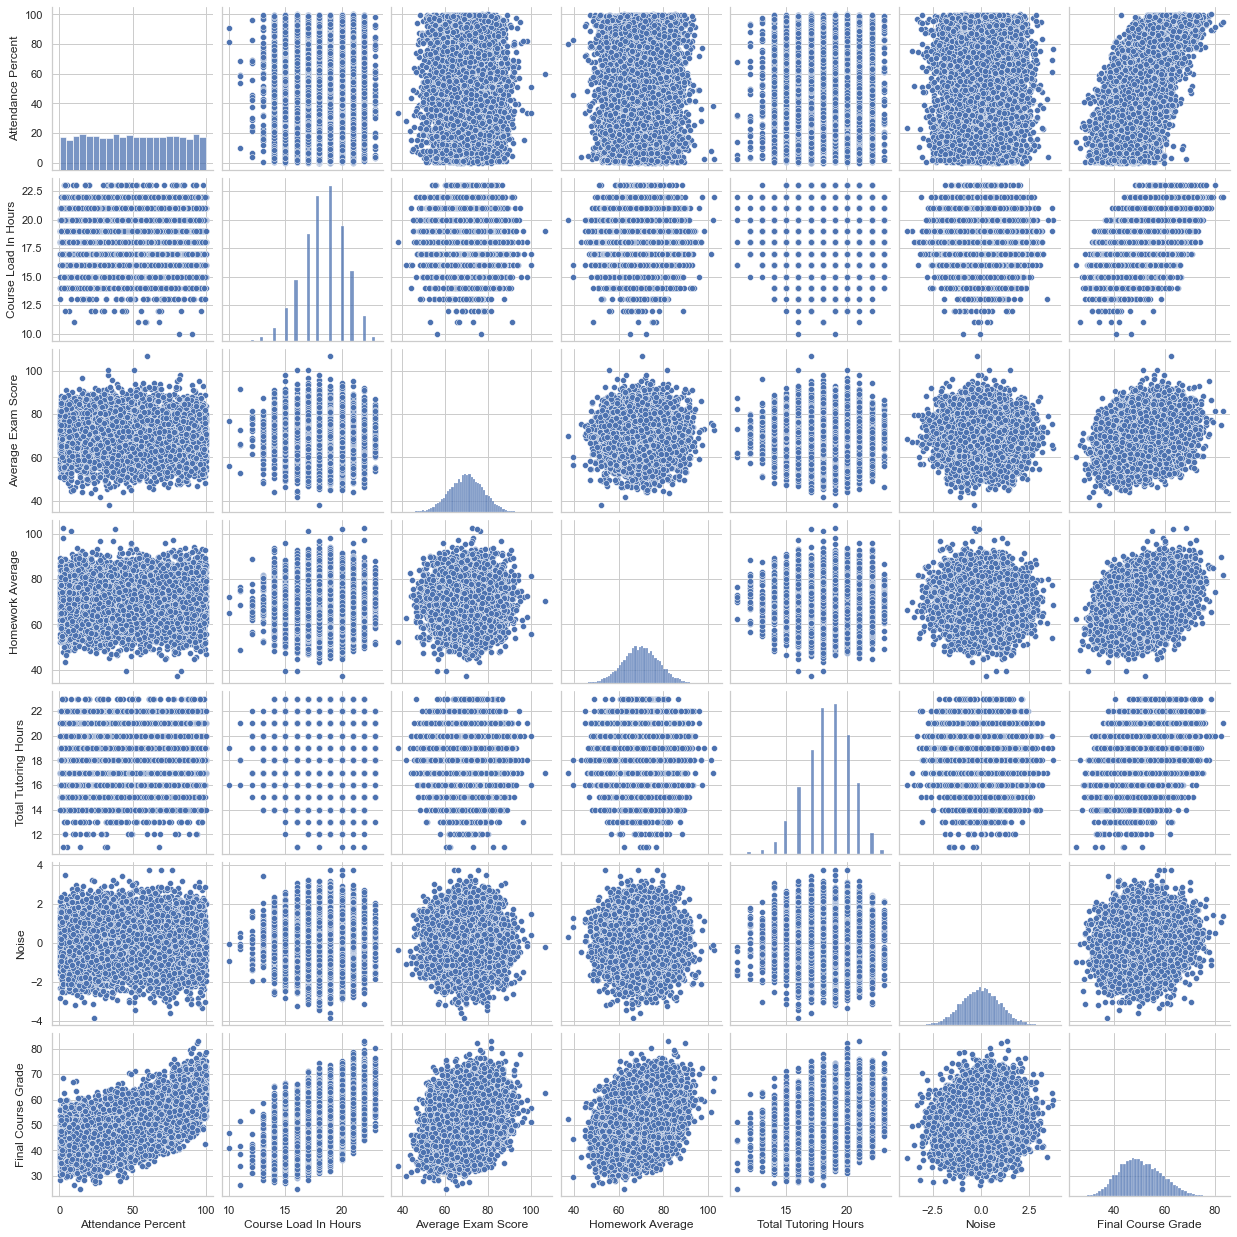

In [121]:
import pandas as pd
import numpy as np
import matplotlib as plt
from numpy.random import default_rng
import seaborn
from matplotlib import pyplot as plt
#features
predictor_columns=['Attendance Percent',
                   'Course Load In Hours', 
                   'Average Exam Score', 
                   'Homework Average', 
                   'Total Tutoring Hours']

#bit generator.  Generates random numbers that are fed into 
#distribution generator
rng=default_rng()
#data set size
n=10000

#feature values.  In reality these variables may be also be highly dependent on each other.
predictor_values={
    'Attendance Percent': rng.uniform(low=0, high=100, size=n),#pick values uniformly from zero to 100
   'Course Load In Hours': rng.binomial(n=23, p=0.8, size=n),
   'Average Exam Score': rng.normal(loc=70, scale=8, size=n), 
   'Homework Average': rng.normal(loc=70, scale=8, size=n), 
   'Total Tutoring Hours': rng.binomial(n=23, p=0.8, size=n),
}

#extremely nonlinear function.  This function is analytic.  If we restrict the values of X, it exists in a 
#linear space of possibly infinite dimension.
#def Y(X):
#    x1,x2,x3,x4,x5=X[0],X[1],X[2],X[3],X[4] 
#    return 25*(x1/100*np.sin(x1)+x2/21*np.cos(x2*x3)+x4/100*np.sin(42*x4)+x5/23)

#more complex nonlinear function.  Note, this function exists in a finite dimension linear space. A model of this form 
#is technically considered linear, as the power terms can be replaced by additional variables.
def Y(X):
    x1,x2,x3,x4,x5=X[0],X[1],X[2],X[3],X[4] 
    return 20*np.power((x1/100),2)+20*np.power((x2/21),3)+20*np.power((x3/100),2)+20*np.power((x4/100),3)+20*np.power((x5/23),2)

#linear case.  The easiest case.  Not always realisitic.
#def Y(X):
#    x1,x2,x3,x4,x5=X[0],X[1],X[2],X[3],X[4] 
#    return 20*(x1/100)+20*(x2/21)+20*(x3/100)+20*(x4/100)+20*(x5/23)

#noise function.  By the empirical rule of statistics, about 99% of the values will be between -3 and 3.  Does not
#actually depend on the value of the input features.  
def N(X):
    #x1,x2,x3,x4,x5=X[0],X[1],X[2],X[3],X[4]
    return rng.normal(loc=0, scale=1,size=1)[0]

#create the data frame we will house our 
Data=pd.DataFrame(data=predictor_values, columns=predictor_columns)

#In reality these variables may be also be highly dependent on each other.
validation_predictor_values={
    'Attendance Percent': rng.uniform(low=0, high=100, size=n),#pick values uniformly from zero to 100
   'Course Load In Hours': rng.binomial(n=23, p=0.8, size=n),
   'Average Exam Score': rng.normal(loc=70, scale=8, size=n), 
   'Homework Average': rng.normal(loc=70, scale=8, size=n), 
   'Total Tutoring Hours': rng.binomial(n=23, p=0.8, size=n),
}
Data=pd.DataFrame(data=predictor_values, columns=predictor_columns)

Data['Noise']=Data.apply(N, axis=1)

#There is typically some noise involved in getting our data.
Data['Final Course Grade']=Data.apply(Y, axis=1)+Data['Noise']
seaborn.pairplot(Data)



# The Models
We create a dictionary of models for comparison. The labels on the left are arbitary. Sklearn provides a variety of well documented models that are all trained via the fit method.  Each can be used to predict values. Each trained model is placed in a similar dictionary. 

In [122]:
#import a variety of models for comparison
from sklearn import linear_model
from sklearn import dummy
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import isotonic
from sklearn import kernel_ridge
from sklearn import model_selection
from sklearn import mixture
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import neural_network

#the models we will compare.  We use default parameters.  See the following for detailed documentation on specific models.
#https://scikit-learn.org/stable/supervised_learning.html
#Not all models are used.  After some comparision, only the best performing has been left.  Feel free to compare
#additional models.  Keep in mind, computation time may increase significantly.
models={
    #'dummy':dummy.DummyRegressor(), 
 #   'ada':ensemble.AdaBoostRegressor(),
    'random_forest':ensemble.RandomForestRegressor(),
    'random_forest_extra':ensemble.ExtraTreesRegressor(),
#    'bagging':ensemble.BaggingRegressor(),
#    'gauss_process':gaussian_process.GaussianProcessRegressor(),
#    'kernel_ridge':kernel_ridge.KernelRidge(),
    'lr_reg':linear_model.LinearRegression(),
    'ridge':linear_model.Ridge(),
    'ridge_cv':linear_model.RidgeCV(),
#    'sgd_regressor':linear_model.SGDRegressor(),
    'el_net':linear_model.ElasticNet(),
    'el_netcv':linear_model.ElasticNetCV(),
    'lars':linear_model.Lars(),
    'lasso':linear_model.Lasso(),
    'lassocv':linear_model.LassoCV(),
 #   'lassolars':linear_model.LassoLars(),
    'lassolarscv':linear_model.LassoLarsCV(),
#    'lassolarsic':linear_model.LassoLarsIC(),
#    'mp_reg':linear_model.OrthogonalMatchingPursuit(),
    'mp_regcv':linear_model.OrthogonalMatchingPursuitCV(),
    'ard':linear_model.ARDRegression(),
    'bayesridge':linear_model.BayesianRidge(),
    'huber':linear_model.HuberRegressor(),
  #  'ransac':linear_model.RANSACRegressor(),
    #'theil':linear_model.TheilSenRegressor(),
    #'gaussbayes_mix':mixture.BayesianGaussianMixture(),
    #'gauss_mix':mixture.GaussianMixture(),
  #  'kneighbors':neighbors.KNeighborsRegressor(),
    #'radius_neighbors':neighbors.RadiusNeighborsRegressor(),
  #  'neural_net':neural_network.MLPRegressor() 
}

y=Data['Final Course Grade']
x=Data[predictor_columns]

#Fit each model to the entire data set
fitted_models={
    key: models[key].fit(x,y) for key in models.keys()
}

# Estimating Generalized Perormance
We want a model that will handle unseen data effectively so long as our training data is reasonably representative of the live data. Evaluating our models based only on their training performance may lead to poor performance on similar but different data. This is called overfitting.

Rather, we should choose our model based on generalized performance.  That is, we base our evaluation on performance of similar but distinct information. 

Training with more information leads to better models. But first, we must choose a model type that has the best general performance.

One strategy is to divy our data up into chunks called folds. We take turns using each fold as the test set, while using the remainder as the training data.  We can score our model on each fold, giving us a distribution of model performance. This is called k-fold cross validation.  Cross validation uses all of our data to evaluate the general performance of a model.

We want to avoid any evaluation being dependent on the order our data is in.  To account for this we will shuffle our data, and  perform cross validation repeatedly to better estimate general performance.

In [123]:
#number of time to repeat cross validation.
shuffle_count = 10
#data frames for the cross validation data
fit_times = pd.DataFrame(columns=list(models.keys()))
score_times = pd.DataFrame(columns=list(models.keys()))
test_scores = pd.DataFrame(columns=list(models.keys()))

#perform cross validation appropriate number of times.
for i in range(0,shuffle_count):
    #shuffle rows of data.
    shuffled_data = Data.sample(frac=1)
    shuffled_y = shuffled_data['Final Course Grade']
    shuffled_x = shuffled_data[predictor_columns]

    #perform cross validation.  The n_jobs parameter determines the number of processors on the running machine will be used.
    #I have 8, and usually like to do other things while running this sort of code, so we only use 7 here.  
    #We perform 10 fold cross validation.  This uses 90% of the data to train, and 10% to evaluate.
    #We use the traditional mean squared error to measure performance. Other metrics are available.
    cv_scores = {
        key:model_selection.cross_validate(
            models[key], shuffled_x, shuffled_y, cv=10, scoring='neg_mean_squared_error', n_jobs=7)
        for key in models.keys()
    }
    fit_times=pd.concat([fit_times,pd.DataFrame({key:cv_scores[key]['fit_time'] for key in cv_scores.keys()})])
    test_scores=pd.concat([test_scores,pd.DataFrame({key:cv_scores[key]['test_score'] for key in cv_scores.keys()})])
    score_times=pd.concat([score_times,pd.DataFrame({key:cv_scores[key]['score_time'] for key in cv_scores.keys()})])

# Visualizing Performance
We plot box plots and kernel desnity estimate graphs for the scores, training time, and fitting times of our candidate models. Generally we want the most accurate model.  That said, we may be willing to compromise with training and fitting time depending on the need. We want the graphs to be relatively narrow and containing a majority of density near zero.

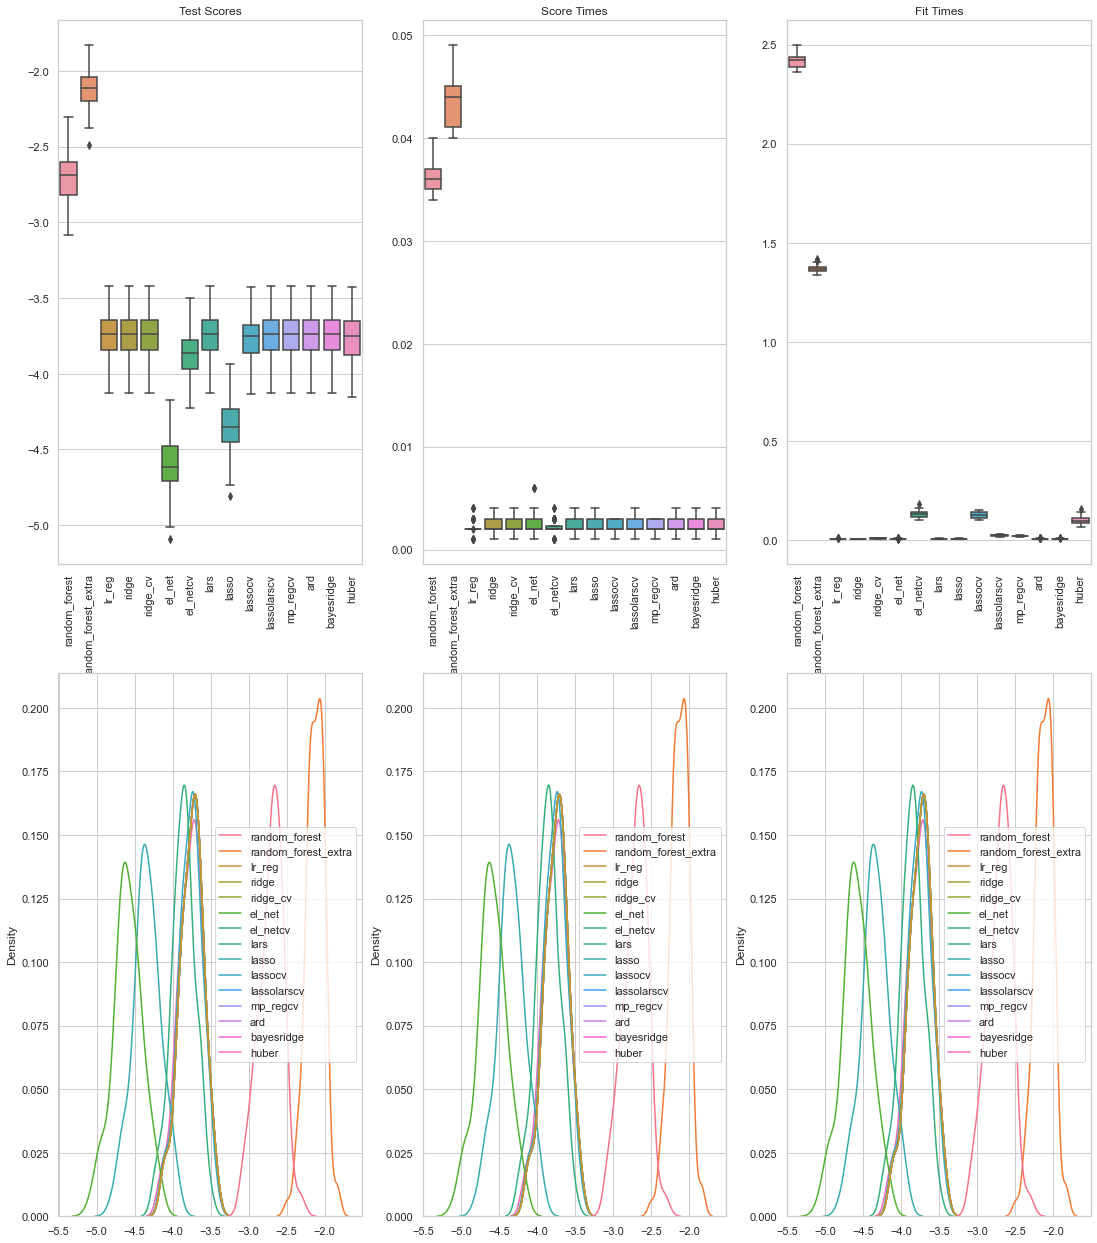

In [124]:
#create subplots
fig, ((bax1, bax2, bax3),(hax1, hax2, hax3)) = plt.subplots(2, 3)
fig.set_size_inches(18.5, 22, forward=True)

seaborn.set_theme(style="whitegrid")
seaborn.set_palette("deep")

#plot test scores
ax=seaborn.boxplot(data=test_scores, ax=bax1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Test Scores')
ax=seaborn.kdeplot(data=test_scores, ax=hax1)

#plot score times
ax=seaborn.boxplot(data=score_times, ax=bax2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Score Times')
ax=seaborn.kdeplot(data=test_scores, ax=hax2)

#plot fit times
ax=seaborn.boxplot(data=fit_times, ax=bax3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Fit Times')
ax=seaborn.kdeplot(data=test_scores, ax=hax3)


# Real Performance
Once we deliver our models they may see production.  In this exercise, we have the luxory of generating more uncorrupted data.  We will evaluate each model's "true" performance with a significant amount of similar but possibly different data. This will serve as validation of our CV results. In reality, this type of validation costs money, time, and affects many people. In our specific example, a bad decision means a student we should have helped may fall through the cracks. We will need to defend our decision on which model actually goes live. This may be in a live public forum. No pressure. We provide a visualization of the true performance.  Remember, we want numbers near zero. A plot of the residuals between median cross validation errors and the true model errors is shown. 


In [125]:
from sklearn.metrics import mean_squared_error

#we will validate our models true performance based on a much larger data set.
n=100000

#generate uncorrupted data
validation_predictor_values={
    'Attendance Percent': rng.uniform(low=0, high=100, size=n),#pick values uniformly from zero to 100
   'Course Load In Hours': rng.binomial(n=23, p=0.8, size=n),
   'Average Exam Score': rng.normal(loc=70, scale=8, size=n), 
   'Homework Average': rng.normal(loc=70, scale=8, size=n), 
   'Total Tutoring Hours': rng.binomial(n=23, p=0.8, size=n),
}
Validation_Data= pd.DataFrame(data=validation_predictor_values, columns=predictor_columns)
Validation_Data['Final Course Grade']=Validation_Data.apply(Y, axis=1)

#Score each fully fitted model.
validation_scores={
    key:[mean_squared_error(models[key].predict(Validation_Data[predictor_columns]), Validation_Data['Final Course Grade'])]
    for key in models.keys()
    }


Text(0.5, 1.0, 'Cross Validation Median Residual Percents')

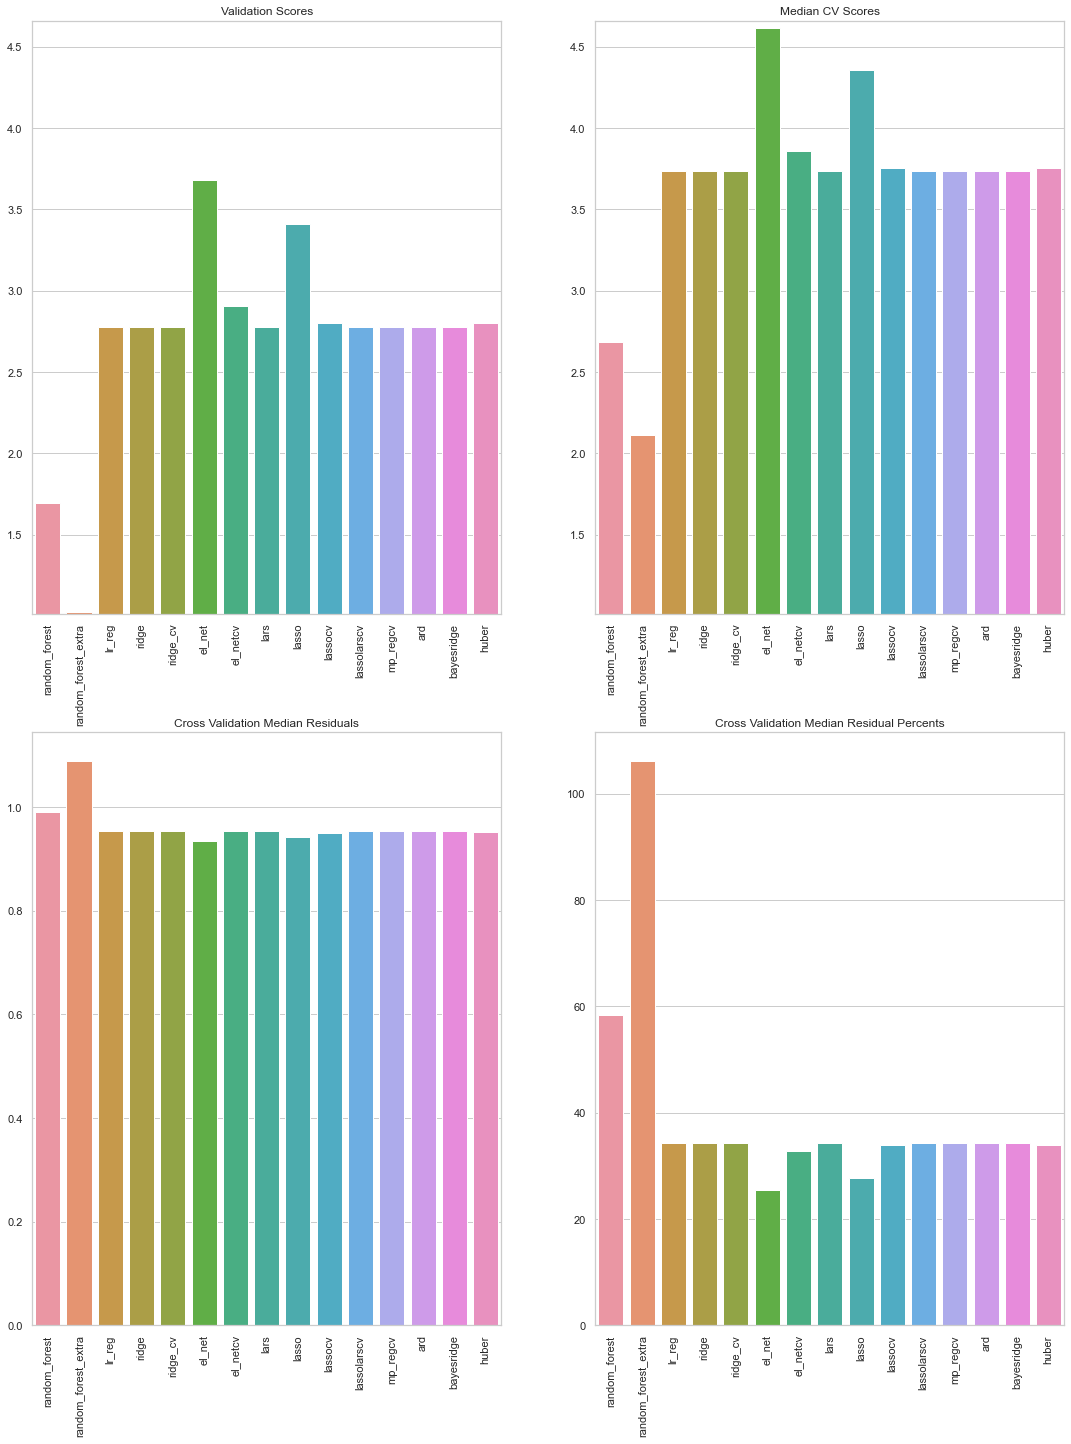

In [126]:
validation_scores_data=pd.DataFrame(validation_scores)
median_cv_scores=pd.DataFrame(test_scores.aggregate('median'))
median_cv_scores_df=pd.DataFrame({s:median_cv_scores.loc[s,:] for s in median_cv_scores.index}).apply(abs)

residuals=(median_cv_scores_df-validation_scores_data)#.apply(lambda x: validation_scores_data[])
residual_percent=residuals/validation_scores_data*100

fig, ((sax1, sax2),(rax1, rax2)) = plt.subplots(2,2)
fig.set_size_inches(18.5, 24, forward=True)

#y limits for the validation, and median cv graphics.
y_min=.99*min(median_cv_scores_df.min(axis=1).iloc[0],validation_scores_data.min(axis=1).iloc[0])
y_max=1.01*max(median_cv_scores_df.max(axis=1).iloc[0],validation_scores_data.max(axis=1).iloc[0])

#create bar chart of scores
sax1=seaborn.barplot(data=validation_scores_data, ax=sax1)
sax1.set_xticklabels(sax1.get_xticklabels(), rotation=90)
sax1.set_title('Validation Scores')
sax1.set_ylim(y_min, y_max)

#create bar chart of scores
sax2=seaborn.barplot(data=median_cv_scores_df, ax=sax2)
sax2.set_xticklabels(sax2.get_xticklabels(), rotation=90)
sax2.set_title('Median CV Scores')
sax2.set_ylim(y_min, y_max)

#create bar chart of residuals
rax1=seaborn.barplot(data=residuals, ax=rax1)
rax1.set_xticklabels(rax1.get_xticklabels(), rotation=90)
rax1.set_title('Cross Validation Median Residuals')

#create bar chart of residual percents
rax2=seaborn.barplot(data=residual_percent,  ax=rax2)
rax2.set_xticklabels(rax2.get_xticklabels(), rotation=90)
rax2.set_title('Cross Validation Median Residual Percents')

# Closing thoughts
The shape of the final validation graphic follows the shape of the cross validation graphics. Random forest performs relatively good for the moderate and extremely nonlinear target functions.  The linear target had several models that had a prediction error of less than half a point. We highly suggest you run the other two models provided. We used default parameters for all of these models and did not clean nor normalize our data.  This makes a huge difference.  There are a variety of additional methods we can apply to improve performance including: parameter selection, denoising, normalization,  feature extraction, and hyper parameter selection. In extreme cases, we may even spread our load among multiple machines. We will continue to explore these topics in the future. 